<img src="./img/DC_Gray _Logo.png">

<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:**

#### Business Problem

#### Analysis

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from data_precleaning import *
from data_cleaning import *
from comparison_attribute import *
from aggregation import *
from election_by_state import *
import matplotlib.pyplot as plt
import seaborn as sns
import hypothesis_tests as ht
import pandas as pd

In [25]:
#clean the files
'''list_of_files=json_filter("json_data")
csv_list=[]
for i in list_of_files:
    jsons=json_generator(i)
    csv_list.append(generate_kickstarter_csv(jsons))'''

'list_of_files=json_filter("json_data")\ncsv_list=[]\nfor i in list_of_files:\n    jsons=json_generator(i)\n    csv_list.append(generate_kickstarter_csv(jsons))'

In [46]:
kickstarter=kickstarter_concat(csv_list,"Trial_Pickle")
category=pd.read_csv("data/categories.csv")
kickstarter_cleaned=full_clean(kickstarter,category)
#cleaned file saved to a pickle

C:\Users\power\OneDrive\Desktop\mod3-hypothesis-testing\data_cleaning.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return dirty_data[(dirty_data['Created_Datetime']>=pd.to_datetime(min_date)) & (dirty_data['Created_Datetime']<=pd.to_datetime(max_date))]


In [47]:
#load all data
kickstarter_clean=pd.read_pickle("data/cleaned_df.pickle")
trustdata = pd.read_csv('data/self-reported-trust-attitudes.csv')
election_data=pd.read_csv('data/1976-2016-president.csv')

In [48]:
#aggregate the election data (to blue state vs red state)
election_agged=DT_Effect(election_data)

In [49]:
kickstarter_us=kickstarter_clean[kickstarter_clean['Country'].isin(['US'])]
#kick_us_agged=Aggregate_Mean(kickstarter_us,['Trump_Election','Sup_Category','State','Created_Month'])
kickstarter_us=kickstarter_us.merge(election_agged, on=['State'])

In [64]:
kickstarter_ca=kickstarter_clean[kickstarter_clean['Country'].isin(['CA'])]

In [66]:
import scipy
import numpy

In [63]:
scipy.stats.ttest_ind(kickstarter_us[kickstarter_us['Trump_Election']==0]['Pledge_Percentage'],kickstarter_us[kickstarter_us['Trump_Election']==1]['Pledge_Percentage'],equal_var=False)

Ttest_indResult(statistic=2.0416228645255567, pvalue=0.04119622214756263)

In [65]:
scipy.stats.ttest_ind(kickstarter_ca[kickstarter_ca['Trump_Election']==0]['Pledge_Percentage'],kickstarter_ca[kickstarter_ca['Trump_Election']==1]['Pledge_Percentage'],equal_var=False)

Ttest_indResult(statistic=-1.2163099220686293, pvalue=0.22396798468424767)

In [62]:
kickstarter_us[kickstarter_us['Trump_Election']==0]['Pledge_Percentage'].sample(10000)

7810       0.000727
31919      0.000000
36537      1.750000
11441    106.698800
16733      2.000000
32544    176.833333
22820      0.000000
16520    100.870000
34247    102.600000
39160      4.733333
48836    117.241667
9570       3.183333
18275    844.153333
21270      7.616667
32681    102.700000
546      958.646667
47377    112.666667
20060      0.000000
9903       0.000000
10648      3.277778
3691     157.000000
46398    117.733333
31514      0.000000
36532      1.750000
3199       0.030000
44875    364.550000
6081       0.000000
16355    102.610000
41631      3.450400
31746    730.347826
            ...    
17863      1.330000
30821      0.000000
29795    200.253333
37460     42.254545
46489    109.800000
5288       0.000000
49927    110.666667
48241    117.777778
35590      0.004000
8942     101.480000
13346    179.000000
6551     103.016667
11273      9.633333
44792      0.014325
2612       0.000000
35120    102.375000
30207    101.060000
28671    331.385000
38780      0.027778


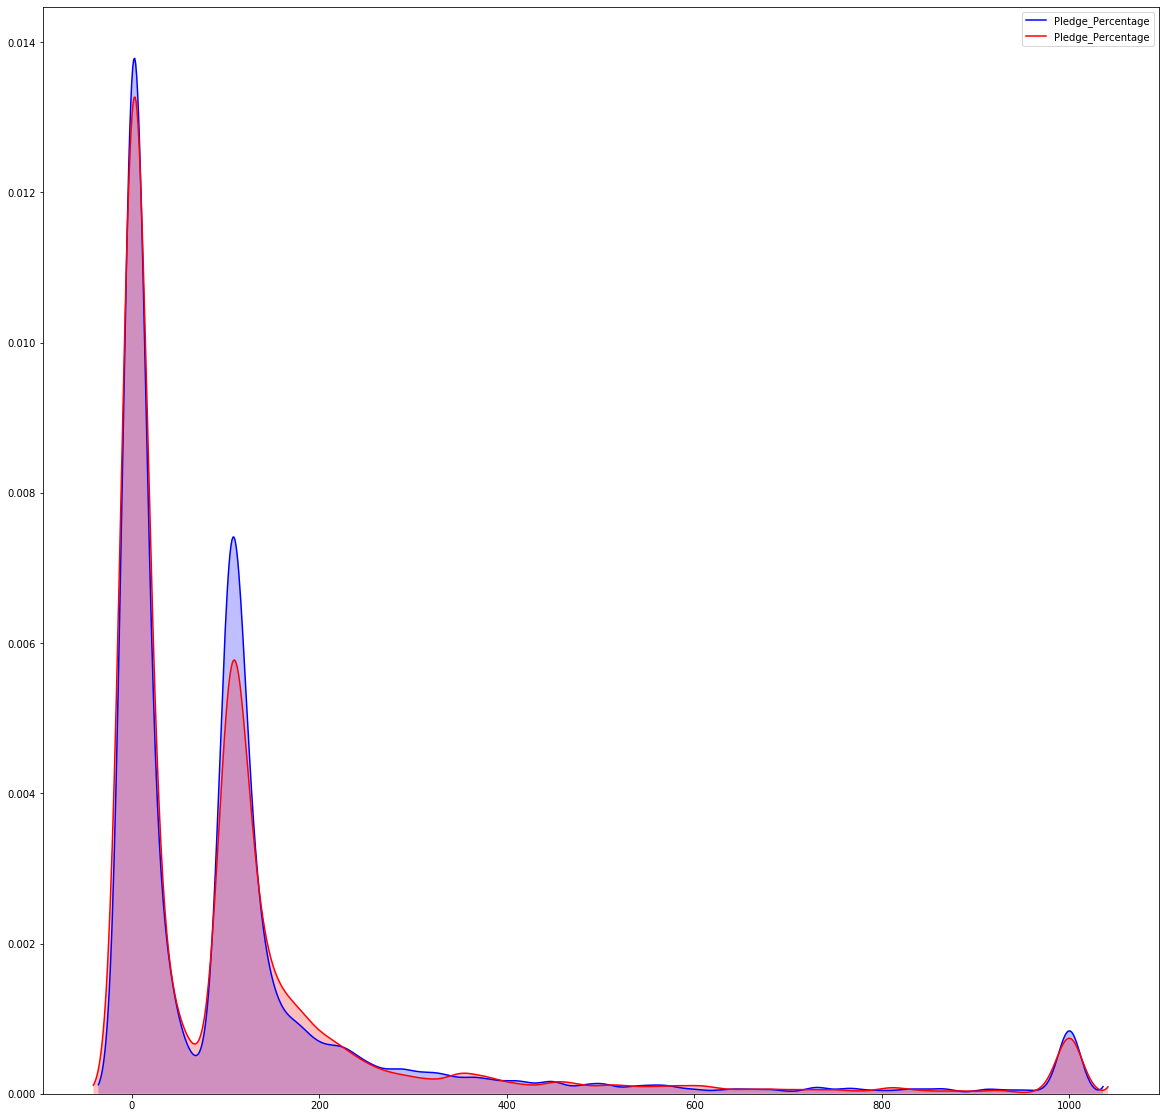

In [56]:
plt.figure(figsize=(20,20))
sns.kdeplot(data=kickstarter_us[kickstarter_us['Trump_Election']==0]['Pledge_Percentage'], shade=True, color="blue",gridsize=1000)
sns.kdeplot(data=kickstarter_us[kickstarter_us['Trump_Election']==1]['Pledge_Percentage'], shade=True, color="red", gridsize=1000)
plt.show()

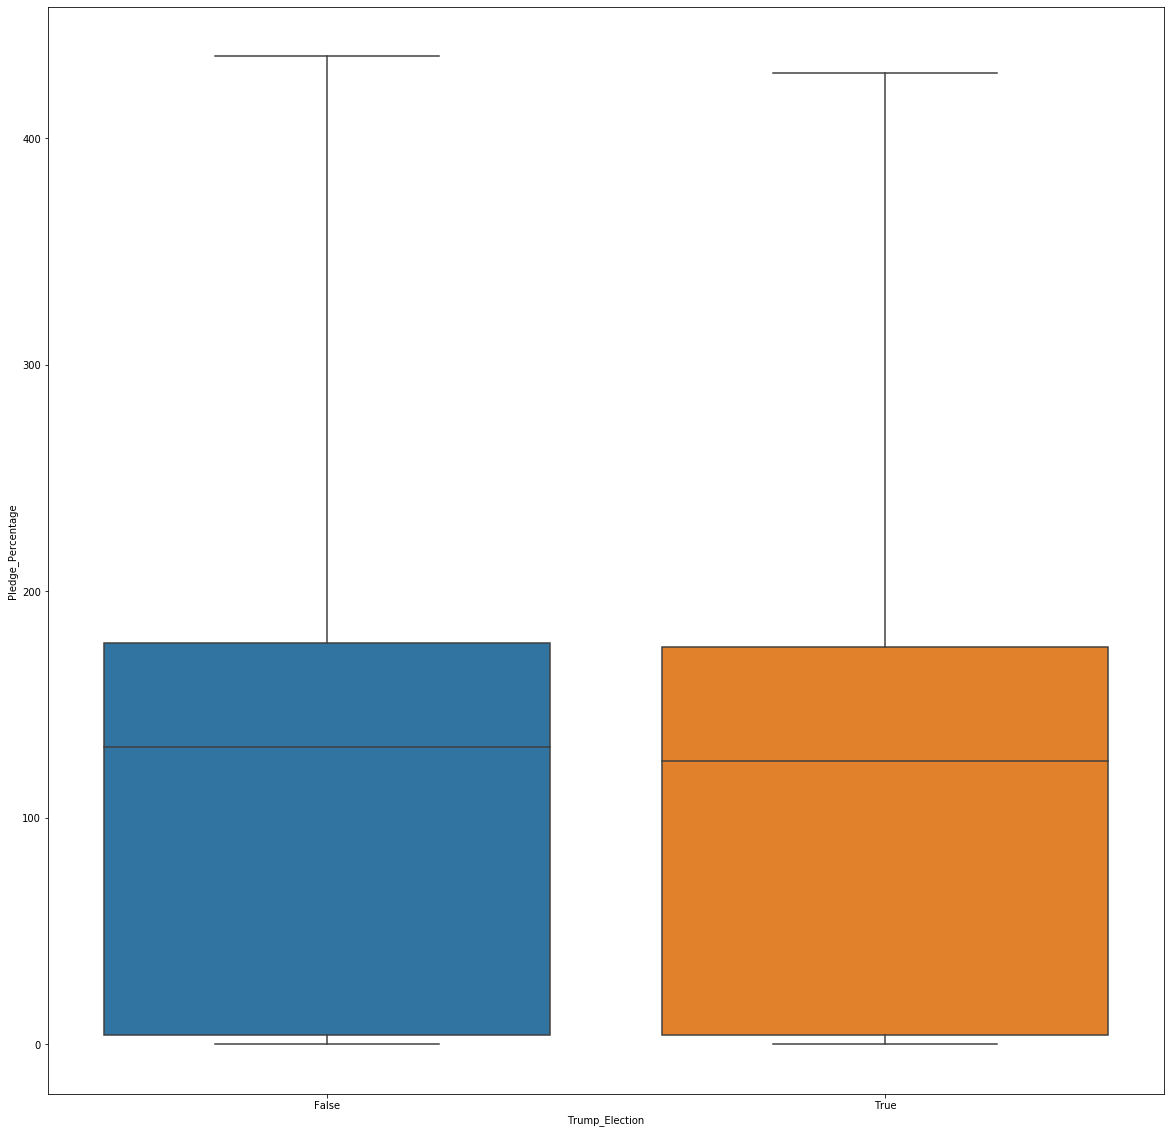

In [14]:
plt.figure(figsize=(20,20))
sns.boxplot(x="Trump_Election", y='Pledge_Percentage',data=kickstarter_gb,showfliers=False)
plt.show()

In [15]:
trust_funding_data=add_trustdata(trustdata, kickstarter_clean)

We use the year(s) [2014] in the trust data
There are 98 countries in the trust data
After merge, there are 85 countries in the country-trust-funding data


In [16]:
trust_funding_data.columns

Index(['Backers', 'Category', 'Country', 'Created_Datetime', 'Creater_ID',
       'Creater_Name', 'Funding_Deadline', 'Goal', 'Name', 'Pledged', 'State',
       'Status', 'Created_Month', 'Deadline_Month', 'Pledge_Percentage',
       'Funding_Duration', 'Trump_Election', 'Trust_Bin', 'Trust_Rank'],
      dtype='object')

In [17]:
trust_funding_data_agg=Aggregate_Mean(trust_funding_data,['Trust_Bin','Created_Month','Category'])

In [19]:
trust_funding_data_country=Aggregate_Mean(trust_funding_data,['Country'])

In [ ]:
['Pledge_Percentage','Trust_Rank']

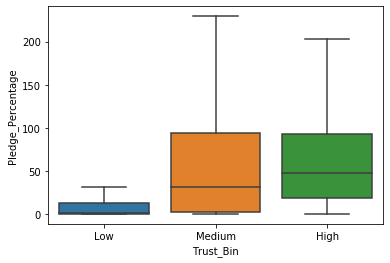

In [18]:
sns.boxplot(x='Trust_Bin', y='Pledge_Percentage', data=trust_funding_data_agg,showfliers=False)

In [119]:
hypothesis_tests = ht.hypothesis_test_one(alpha = 0.05, cleaned_data = trust_and_country_pledge_rate)

NameError: name 'trust_and_country_pledge_rate' is not defined

#### Findings & Application

#### Limitations

#### Next Steps

In [153]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
 
# Make a data frame with the GPS of a few cities:
data = pd.DataFrame({
'lat':[-58, 2, 145, 30.32, -4.03, -73.57, 36.82, -38.5],
'lon':[-34, 49, -38, 59.93, 5.33, 45.52, -1.29, -12.97],
'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador']
})
 
# A basic map
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a marker per city of the data frame!
m.plot(data['lat'], data['lon'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [150]:
!pip install mpltoolkits

  Could not find a version that satisfies the requirement mpltoolkits (from versions: )
No matching distribution found for mpltoolkits
